# Numerical Error

Arithmetics with **floating point** numbers is not exact, causing acumulation of numerical error.

In modern computers, the floating point is presented as `Sign ∗ Mantisa ∗ Exponent`.
The largest and the smallest floating point number depends on the type. Most often we will
use python `float`, which needs `8bytes=64bits` and can store numbers between 2.22507e-308 to
1.79769e+308. It is composed of roughly: 9-bits exponent, 54-bits mantisa, 1-bit sign.

The overflow error occurs if we want to store $x > 1.79769\; 10^{308}$ and underflow when
$x < 2.22507\; 10^{−308}$. These numbers are sufficiently large/small that usually do not cause problems. 
If they do, we should probably work with logarithms of the numbers (`log` representation).

The **roundoff error** is the hardest problem to avoid, which occurs when : $1+\epsilon == 1$.

For 64-bit `float` it occurs around (only!) $2 10^{−16}$.

In [1]:
for i in range(1,10):
    x=1+i*1e-16-1
    print('1 + '+str(i)+'e-6 -1 = ', x)

1 + 1e-6 -1 =  0.0
1 + 2e-6 -1 =  2.220446049250313e-16
1 + 3e-6 -1 =  2.220446049250313e-16
1 + 4e-6 -1 =  4.440892098500626e-16
1 + 5e-6 -1 =  4.440892098500626e-16
1 + 6e-6 -1 =  6.661338147750939e-16
1 + 7e-6 -1 =  6.661338147750939e-16
1 + 8e-6 -1 =  8.881784197001252e-16
1 + 9e-6 -1 =  8.881784197001252e-16


Many numerical methods rely on iterations, which cause so called error accumulation, and just within a few steps the numerical error makes result useless.

Typical example is the three term linear recurrence relation, 
$$x_{n+1}= a_n x_n + b_n x_{n-1},$$ 
which can very quickly become unstable. Here $a_n$ and $b_n$ are some real or complex numbers. The three points recurrence relation is related to the finite difference equation for the general second order differential equation. But is very commonly used to obtain special functions, such as Bessel functions, associated Legendre functions, regular Coulomb wave functions, etc.

For constant coefficient, $a_n=a$ and $b_n=b$, the exact solution can be found by the zeros of the characteristic polynomial. More specifically, we search for the solution in the form
$$a_n = C r^n, $$ 
which gives
$$r^{n+1} = a r^n + b r^{n-1}$$
which is solved by characteristic polynomial of the form
$$r^2 - a r - b=0.$$
For $n$-point recurence relation we would have characteristic polynomial of the $n-1$ power.
For the three points recurence relation, we have thus two solutions
$$r_{1,2} = \frac{1}{2}a \pm \frac{1}{2}\sqrt{a^2+ 4 b}. $$
The generic solution is than of the form
$$ a_n = C_1 r_1^n + C_2 r_2^n. $$
If $a^2+4b=0$, and the characteristic polynomial has only one solution, the solution of the tree-point recurrence is instead:
$$ a_n = C_1 r_1^n + C_2 n r_1^n.$$

Even when coefficients are not constant, the $n$-term linear recurrence relation has exactly $n-1$ solutions. They can not be found analytically or exactly, but we know that they exist.
However, only one solution out of $n-1$ is easy to follow, namely, the one that grows the fastest in the direction of recurence.

For three-point recurence relation, we have two solutions: one is typically increasing and one is decreasing. 

Hence for three point recurrence relation, this instability can be easily fixed by so-called Miller’s algorithm. If iteration in **one direction is unstable**, it is likely **stable in the opposite direction**.


Examples of three point recurrence relation include:

**Bessel Functinons**
$$ j_{l+1}(x) = \frac{2l+1}{x} j_l(x) - j_{l-1}(x)$$
**Modified Bessel Functions**
$$ j_{l+1}(x) = -\frac{2l+1}{x} j_l(x) + j_{l-1}(x)$$
**Legendre Polynomials**
$$(n+1) P_{n+1}(x) = (2n+1) x P_n(x)-n P_{n-1}(x)$$
**Associated Legendre polynomials**
$$(l-m+1) P^m_{l+1}(x)=(2l+1) x P^m_l(x) - (l+m)P^m_{l-1}$$
$$2 m x P^m_l(x) = -\sqrt{1-x^2}\left[ P^{m+1}_l(x)+(l+m)(l-m+1)P^{m-1}_l(x)\right]$$
in terms of them the spherical harmonics are given
$$Y_{l,m}(\theta,\phi)=\sqrt{\frac{(2l+1)(l-m)!}{4\pi(l+m)!}}P^m_l(\cos\theta)e^{i m\phi},$$
which are used to solve the 3D partial differential equation of the form
$$\nabla^2 \psi(\theta,\phi) + \lambda\; \psi(\theta,\phi)=0.$$
**Confluent Hypergeometric Series**
$$(b-n) M_{n-1} + (2n-b+x)M_n - n M_{n+1}=0$$
with solution $M_n=M(n,b; x)$.

## Spherical Bessel functions

The spherica Bessel functions satisfy the two point recurrence relation:

$$ j_{l+1}(x)=\frac{2l+1}{x} j_l(x)-j_{l-1}(x)$$

with the initial condition $$j_0(x)=\frac{\sin x }{x}$$ and 
$$j_1(x)=\frac{\sin x}{x^2}-\frac{\cos x}{x}$$

This recurrence relation should be sufficient to compute $j_l(x)$ for any $l$ and any $x$. However, as we will see below, the numeric iteration becomes extremely unstable for $x \lesssim l$. 

Any three term linear recurrence relation must have exactly two solutions. In case of Bessel functions $j_l(x)$, we also have Neumann functions $n_l(x)$, which satisfy exactly the same recurrence relation, but have different initial condition. If $n_l(x)$ is much larger than $j_l(x)$ the iteration will very quickly start to follow $n_l(x)$ even though we started with $j_l(x)$. As is well known $n_l(x)$ are diverging at small $x$ while $j_l(x)\propto x^l$ are very small. Obviously small $x$ and large $l$ are challenging for this algorithm.


To refresh our memory, spherical Bessel functions are solutions of the radial Schroedinger equation, as well as the Electromagnetic waves in a cylindrical symmetry, 
heat conduction in a cylindrical object, 
and many other applications.

They are the solution of the following differential equation:

$$\left[-\frac{1}{2}\frac{d^2}{dr^2}+\frac{l(l+1)}{2 r^2}\right]\left(r j_l(r)\right) = E \left(r j_l(r)\right)$$

We will first iterate the recurrence relation for $j_l(x)$ starting at $l=0$. 
This is called **upward recurrence**. If this process proves to be unstable, we will demonstrate that **downward recurrence** becomes stable and serves as the solution to this problem.

### Upward recurrence

We will evaluate bessel upward recurrence using the formula

\begin{equation}
j_{l+1}(x) = \frac{2l+1}{x} j_l - j_{l-1}
\end{equation}

In [2]:
from scipy import *
from numpy import *

def bessel_upward(l,x):
    "returns array of j_i from i=0 to i=l, including l"
    res = zeros(l+1)
    if abs(x)<1e-30: # first take care of the special case, which is numerically hard.
        res[0]=1.
        return res
    j0 = sin(x)/x
    res[0]=j0
    if l==0: return res
    j1 = j0/x - cos(x)/x
    res[1] = j1
    
    for i in range(1,l):
        j2 = (2*i+1)/x*j1 - j0  # (j2,j1,j0)==(j_{i+1},j_i,j_{i-1})
        res[i+1]=j2             # store j_{i+1}
        j0,j1 = j1,j2           # prepare for the next step (j_{i-1},j_i) <- (j_i,j_{i+1})
    return res

In [3]:
from scipy import special

l=10
x=0.1

dat0 = bessel_upward(l,x)
dat1 = special.spherical_jn(range(l+1),x)

diff = dat0-dat1

print("%4s %16s %16s %16s %16s" % ('l','exact','upward','abs-error','rel-error'))
for i in range(len(dat0)):
    print("%4d %16.13f %16.13f %16.13f %16.8g" % (i,dat1[i],dat0[i],diff[i], diff[i]/dat1[i]))

   l            exact           upward        abs-error        rel-error
   0  0.9983341664683  0.9983341664683  0.0000000000000                0
   1  0.0333000119026  0.0333000119026  0.0000000000000    2.9172516e-15
   2  0.0006661906084  0.0006661906084  0.0000000000000    6.4359747e-12
   3  0.0000095185197  0.0000095185199  0.0000000000002    2.2510964e-08
   4  0.0000001057720  0.0000001057870  0.0000000000150    0.00014176421
   5  0.0000000009616  0.0000000023109  0.0000000013493        1.4031448
   6  0.0000000000074  0.0000001484162  0.0000001484088        20061.914
   7  0.0000000000000  0.0000192917991  0.0000192917990    3.9116462e+08
   8  0.0000000000000  0.0028936214469  0.0028936214469    9.9738775e+12
   9  0.0000000000000  0.4918963541799  0.4918963541799    3.2213554e+17
  10  0.0000000000000 93.4574136727252 93.4574136727252    1.2852544e+22


What happens with upward recurrence?

In [4]:
x=0.1
j9  = special.spherical_jn(9,x)
j10 = special.spherical_jn(10,x)
j11 = special.spherical_jn(11,x)

j11a = (2*10+1)/x * j10 - j9  # upward
j9a = (2*10+1)/x * j10 - j11  # downward
print('part1 upward or downward=', (2*10+1)/x*j10)
print('part2 upward=', -j9)
print('part2 downward=', -j11)

print('j9=', j9a, 'j9_exact=', j9, 'abs-err=', j9a-j9, 'rel-err=', (j9a-j9)/j9)
print('j11=', j11a, 'j11_exact=',j11, 'abs-err=', j11a-j11, 'rel-err=', (j11a-j11)/j11)

part1 upward or downward= 1.5270173093098784e-18
part2 upward= -1.5269856934948229e-18
part2 downward= -3.16158150515107e-23
j9= 1.526985693494827e-18 j9_exact= 1.5269856934948229e-18 abs-err= 4.044452883213195e-33 rel-err= 2.648651457864433e-15
j11= 3.161581505555956e-23 j11_exact= 3.16158150515107e-23 abs-err= 4.048855109557025e-33 rel-err= 1.280642331364966e-10


### Downward recurrence : Miller's algorithm

Now we will use recurrence:

\begin{eqnarray}
j_{l-1} = (2l+1)/x j_l - j_{l+1}
\end{eqnarray}

Because the recurrence relation is linear and homogeneous, we are allowed to multiply all accumulated values $j_l$ with an arbitrary constant, and they will still represent solution of the same recurrence relation. We can use this to rescale all values $j_l$. We know $j_0=\frac{\sin(x)}{x}$, hence we can use this to rescale all $j_l$ in the series.

We can start with $j_{l_{max}+1}=0$ and $j_{l_{max}}=1$ as we know that the values of $j_l$ fall of quickly, and we are allowed to make substantial error at large enough $l$.

In [5]:
def bessel_downward(l,x):
    "downward recursion"
    if abs(x)<1e-20:   # again take care of the special case where the algorithm would be unstable.
        res = zeros(l+1)
        res[0]=1
        return res
    lstart = l + int(sqrt(10*l)) # this is a reasonable l_max
    j2 = 0.
    j1 = 1.
    res = [] # [j_l,j_{l-1},.....j_0]
    for i in range(lstart,0,-1):
        j0 = (2*i+1)/x * j1 - j2
        if i-1<=l : res.append(j0)
        j2,j1 = j1,j0
    res.reverse()      # reverse the list: [j0,j1,....j_l]
    true_j0 = sin(x)/x
    res = array(res) * true_j0/res[0]
    return res

In [6]:
l=10
x=0.1
dat0 = bessel_downward(l,x)
dat1 = special.spherical_jn(range(l+1),x)
diff=dat0-dat1

print("%4s %16s %16s %16s %16s" % ('l','exact','downward','abs-error','rel-error'))
for i in range(len(dat0)):
    print("%4d %16.13f %16.13f %16.13f %16.8g" % (i,dat1[i],dat0[i],diff[i], diff[i]/dat1[i]))

   l            exact         downward        abs-error        rel-error
   0  0.9983341664683  0.9983341664683  0.0000000000000                0
   1  0.0333000119026  0.0333000119026 -0.0000000000000   -1.4586258e-15
   2  0.0006661906084  0.0006661906084 -0.0000000000000   -9.7647925e-16
   3  0.0000095185197  0.0000095185197 -0.0000000000000   -1.6017819e-15
   4  0.0000001057720  0.0000001057720 -0.0000000000000   -2.7527846e-15
   5  0.0000000009616  0.0000000009616 -0.0000000000000   -2.1504626e-16
   6  0.0000000000074  0.0000000000074  0.0000000000000    8.7358062e-16
   7  0.0000000000000  0.0000000000000 -0.0000000000000   -1.6634916e-15
   8  0.0000000000000  0.0000000000000 -0.0000000000000   -1.1895996e-15
   9  0.0000000000000  0.0000000000000 -0.0000000000000   -1.8918939e-15
  10  0.0000000000000  0.0000000000000 -0.0000000000000   -4.5522754e-15


In [7]:
def bessel_j(l,x):
    "combines upward and downward recursion"
    if l<=x : return bessel_upward(l,x)
    # If x is largel we only need upward recursion. However, when x is small, we need both the
    # upward and downward. The upward for l<x and downward for l>x.
    lcritical = int(x)
    if lcritical<=0 : return bessel_downward(l,x)  # for very small x we only need downward recursion
    
    _ju_ = bessel_upward(lcritical-1,x)             # upward works
    _jd_ = bessel_downward(l,x)
    return hstack( (_ju_, _jd_[lcritical:]) )

In [8]:
l=10
x=0.1
dat0 = bessel_upward(l,x)
dat1 = bessel_downward(l,x)
dat2 = bessel_j(l,x)
date = special.spherical_jn(range(l+1),x)
diff = date-dat2
#print('difference=', date-dat2)
#print('updard-diff=', date-dat0)
#print('down-diff=', date-dat1)


print("%4s %16s %16s %16s %16s" % ('l','exact','combined','abs-error','rel-error'))
for i in range(len(dat0)):
    print("%4d %16.13f %16.13f %16.13f %16.8g" % (i, date[i], dat2[i], diff[i], diff[i]/date[i]))

   l            exact         combined        abs-error        rel-error
   0  0.9983341664683  0.9983341664683  0.0000000000000                0
   1  0.0333000119026  0.0333000119026  0.0000000000000    1.4586258e-15
   2  0.0006661906084  0.0006661906084  0.0000000000000    9.7647925e-16
   3  0.0000095185197  0.0000095185197  0.0000000000000    1.6017819e-15
   4  0.0000001057720  0.0000001057720  0.0000000000000    2.7527846e-15
   5  0.0000000009616  0.0000000009616  0.0000000000000    2.1504626e-16
   6  0.0000000000074  0.0000000000074 -0.0000000000000   -8.7358062e-16
   7  0.0000000000000  0.0000000000000  0.0000000000000    1.6634916e-15
   8  0.0000000000000  0.0000000000000  0.0000000000000    1.1895996e-15
   9  0.0000000000000  0.0000000000000  0.0000000000000    1.8918939e-15
  10  0.0000000000000  0.0000000000000  0.0000000000000    4.5522754e-15


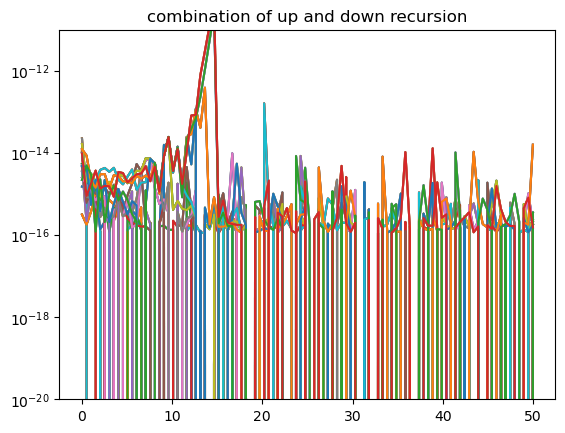

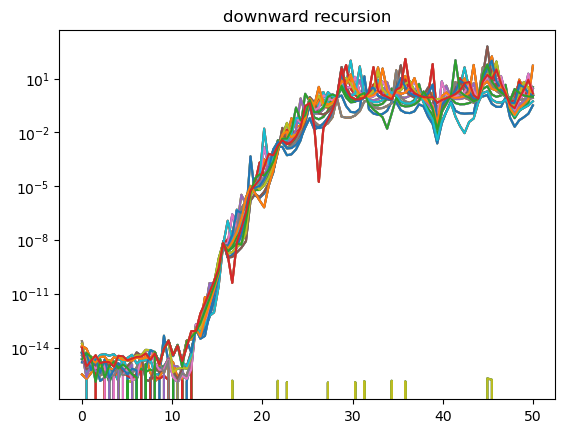

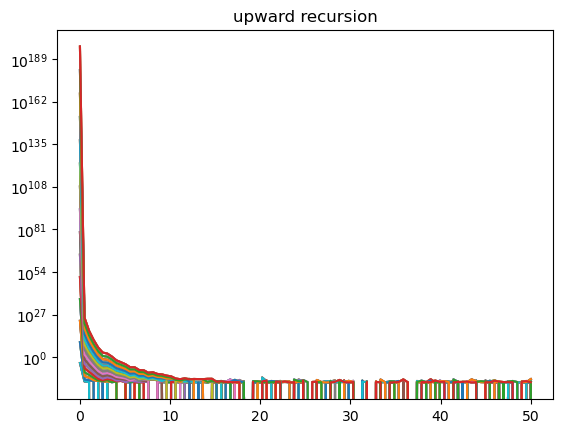

In [9]:
from pylab import *
%matplotlib inline

l=15
x = linspace(1e-6,50,100)
dat0 = array([bessel_upward(l,t) for t in x])
dat1 = array([bessel_downward(l,t) for t in x])
dat2 = array([bessel_j(l,t) for t in x])
date = array([special.spherical_jn(range(l+1),t) for t in x])

for i in range(5,l,3):
    semilogy(x, abs((dat2-date)/date))
title('combination of up and down recursion')
ylim([1e-20,1e-11])

show()

for i in range(5,l,3):
    semilogy(x, abs((dat1-date)/date))
title('downward recursion')
show()

for i in range(5,l,3):
    semilogy(x, abs((dat0-date)/date))
title('upward recursion')
show()


## Homework:

We want to compute the series of integrals, defined by
$$K_n(z,\alpha) = \int_0^1 dx \frac{x^n}{z+\alpha x}$$
when $n=0,1,...n_{max}=10$.

These occur, for example, when we evaluate matrix elements of the following correlation function
$$<P_n(x)|G_(x)|P_m(x)>,$$ where $P_n(x)$ is Legendre polynomial, and $G(x)=\frac{1}{z-x}$ is the Green's function.

We can derive recurrence relation by noting
$$K_{n+1}(z,\alpha) = \int_0^1 dx \frac{x^n(x+z/\alpha) -  x^n z/\alpha}{z+\alpha x}=
\frac{1}{\alpha} \int_0^1 dx x^n -\frac{z}{\alpha}\int_0^1 dx  \frac{x^n}{z+\alpha x}$$
which gives
$$K_{n+1} = \frac{1}{\alpha(n+1)}-\frac{z}{\alpha} K_n$$

We can also calculate $K_0$:
$$K_0=\frac{1}{\alpha} \log(1+\alpha/z)$$

- Starting for $K_0$ you can compute $K_n$ up to $n_{max}$ using recurrence. This works quite well for $|\alpha/z|\gtrapprox 1$.

- Choosing $z$ and $\alpha$ so that $|\alpha/z|\ll 1$ (for example $\alpha/z=10^{-4}$) verify that upward recurrence is unstable.

- Implement downward recurrence for $\alpha/z<1/2$. Since recurrence relation is not homogeneous, we can not start with arbitrary value and later normalize result. We thus need to start with very accurate value of $K_{n_{max}}$. 
Use power series expansion for $K_{n_{max}}$ in powers of $(\alpha/z)^k$, and evaluate as many terms as needed to achieve desired accuracy (say $10^{-12}$).

We can derive the power series in $\alpha/z$ by Taylor expansion:
$$K_n(z,\alpha) = \frac{1}{z}\int_0^1 dx \frac{x^n}{1+\alpha/z x}=
\frac{1}{z} \sum_{k=0}^{\infty}(-\alpha/z)^k \int_0^1 dx x^{n+k}=
\frac{1}{z} \sum_{k=0}^{\infty}\frac{(-\alpha/z)^k}{n+k+1}$$
For $n$ large and $|\alpha/z|<1/2$ this series is is converging well.

The first order recurrence relation can be solved analytically by the algorithm described in <a href="https://en.wikipedia.org/wiki/Recurrence_relation">wikipedia:Recurrence relation</a>

The solution is:

$$K_n = \left(-\frac{z}{\alpha}\right)^n\left[K_0 + \frac{1}{\alpha}\sum_{k=1}^{n} \frac{\left(-\frac{\alpha}{z}\right)^k}{k}\right]$$

By noting that Taylor expansion of $\log(1+x)=-\sum_{k=1}^{\infty} \frac{(-x)^k}{k}$, we see that 
$$K_0=-\frac{1}{\alpha}\sum_{k=1}^\infty \frac{\left(-\frac{\alpha}{z}\right)^k}{k}$$
and inserting this expression into previous formula for $K_n$ gives Taylor expansion that we derived for small $\alpha/z$ above.


You can use this expression to check your implementation of recurrence relation.